# <font color="blue"> Assignment_2: Neural Networks for Handwritten Digit Recognition, Multiclass </font>

In [1]:
#IMPORTING DEPENDENCY
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./Materials_By_Deeplearning/deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

<a name="3"></a>
## <font color="Maroon"> Softmax Function </font>
A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector $\mathbf{z}$ is generated by a linear function which is fed into a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.
<center>  <img  src="./Materials_By_Deeplearning/images/C2_W2_NNSoftmax.PNG" width="600" />  

## <font color="red"> NumPy Implementation of Softmax: <font>

In [2]:
def Numpy_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """  
    
    a = np.zeros_like(z)
    len_z = len(z)
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z)
    
    for i in range (len_z):
        a[i] = exp_z[i]/sum_exp_z 
        
    return a

In [3]:
# Testing our softmax function with Tensor flow softmax function 
z = np.array([1., 2., 3., 4.])
a = Numpy_softmax(z)
atf = tf.nn.softmax(z)
print(f"Numpy_softmax(z):      {a}")
print(f"tensorflow softmax(z): {atf}")

Numpy_softmax(z):      [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


## <font color="red"> Neural Networks <font>

### Problem Statement

In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 



You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [4]:
#LOADING DATA
x_train = np.load('Materials_By_Deeplearning/data/X.npy')
y_train = np.load('Materials_By_Deeplearning/data/Y.npy')
print("x_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("y_train class are ",np.unique(y_train))

x_train.shape (5000, 400)
y_train.shape (5000, 1)
y_train class are  [0 1 2 3 4 5 6 7 8 9]


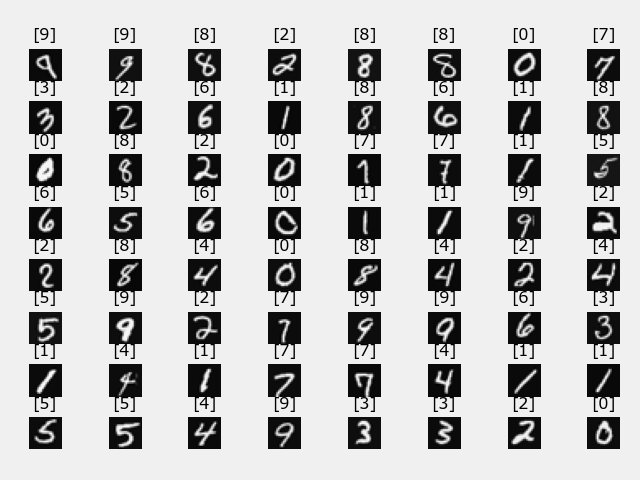

In [10]:
row,col = x_train.shape
plt_row = 8
plt_col = 8

fig,ax = plt.subplots(plt_row,plt_col)
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i in range (plt_row):
    for j in range (plt_col): 
        ramdom_index = np.random.randint(row)
        image = x_train[ramdom_index].reshape(20,20).T
        ax[i,j].imshow(image, cmap='gray')
        ax[i,j].set_title(y_train[ramdom_index])
        ax[i,j].set_axis_off()


<a name="4.3"></a>
### 4.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="Materials_By_Deeplearning/images/C2_W2_Assigment_NN.png" width="600" height="450">

In [6]:
#DEFINING THE MODEL
tf.random.set_seed(1234) 
Model = Sequential([
    
    Dense(units=25, activation="relu", name="Relu_Layer_25"),
    Dense(units=15, activation="relu", name="Relu_Layer_15"),
    Dense(units=10, activation="linear", name="Linear_Layer_15")

],name="Handwritten_Digit_Reco.")

Model.compile(
    
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer= tf.keras.optimizers.Adam(0.01)
)

In [7]:
Model.fit(x_train,y_train,epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 1ms/step - loss: 0.7423
Epoch 2/40
157/157 [==============================] - 0s 962us/step - loss: 0.3038
Epoch 3/40
157/157 [==============================] - 0s 915us/step - loss: 0.2353
Epoch 4/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2097
Epoch 5/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1596
Epoch 6/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1408
Epoch 7/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1378
Epoch 8/40
157/157 [==============================] - 0s 952us/step - loss: 0.1048
Epoch 9/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1334
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1165
Epoch 11/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0925
Epoch 12/40
157/157 [==============================] - 0s 1ms/step - loss: 0.0867
Epoch 13/40
157/157

In [8]:
Model.summary()

Model: "Handwritten_Digit_Reco."
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Relu_Layer_25 (Dense)       (None, 25)                10025     
                                                                 
 Relu_Layer_15 (Dense)       (None, 15)                390       
                                                                 
 Linear_Layer_15 (Dense)     (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 81ms/step
 predicting a Two: 
[[ 27.128036   -16.266802    -1.5396854   -7.8235598  -32.142086
  -24.254776    -9.032306   -10.892487     0.11456388  -1.3265076 ]]
 Largest Prediction index: 0
 Actual index is: [0]


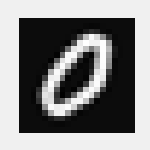

In [9]:
def display_digit(x):
    fig,ax = plt.subplots(1,1,figsize=(1.5,1.5))
    image = x.reshape(20,20).T
    ax.imshow(image, cmap="gray")
    ax.set_axis_off()

index = 90
image_of_two = x_train[index]
prediction = Model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
display_digit(image_of_two)
print(f" Largest Prediction index: {np.argmax(prediction)}")
print(f" Actual index is: {y_train[index]}")
